In [8]:
import os

path, dirs, files = next(os.walk('train'))

print("There is")
print(len(files))
print("files in trains")

There is
25000
files in trains


In [9]:
file_names = os.listdir('train')

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

<function matplotlib.pyplot.show(close=None, block=None)>

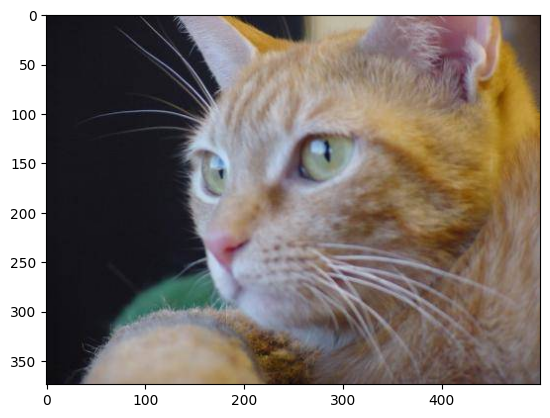

In [11]:
cat = mping.imread('train/cat.1044.jpg')
plt.imshow(cat)
plt.show

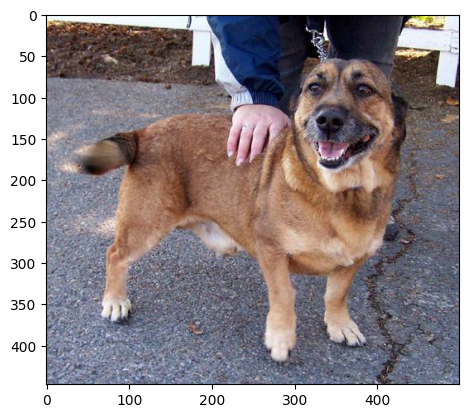

In [12]:
dog = mping.imread('train/dog.10035.jpg')
plt.imshow(dog)
plt.show()


In [13]:
cat_files = []
dog_files = []

labels = []


for file_name in file_names:
    if file_name.startswith('cat'):
        cat_files.append(file_name)

        labels.append(0)
    elif file_name.startswith('dog'):
        dog_files.append(file_name)

        labels.append(1)

print(len(cat_files))
print(len(dog_files))

12500
12500


In [14]:
# import PIL

# for file_name in file_names:
#     img = PIL.Image.open('train/' + file_name)
#     img = img.resize((224, 224))
#     img = img.convert('RGB')

#     img.save('resized/' + file_name)

In [15]:
file_names = os.listdir('train')

In [16]:
import cv2
import glob
import numpy as np

dog_cat_images = []

for file_name in file_names:
    dog_cat_images.append(cv2.imread('resized/' + file_name))

dog_cat_images = np.asarray(dog_cat_images)

In [17]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dog_cat_images, labels, test_size=0.2, random_state=2)

X_train_scaled = X_train/255

X_test_scaled = X_test/255

MemoryError: Unable to allocate 22.4 GiB for an array with shape (20000, 224, 224, 3) and data type float64

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

model.fit(X_train_scaled, Y_train, epochs=5)